In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Activation, Flatten, Dropout,BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

from sklearn import datasets
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns

import io


# Fasion Mnist CNN

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()     

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# CNN 네트워크 구성

In [ ]:
input_size = (28,28,1)

model = Sequential()

model.add(  Convolution2D(32, kernel_size=(3,3), padding='same', 
                          activation='relu',  input_shape = input_size,)    )   
model.add(  Convolution2D(32, kernel_size=(3,3), padding='same',  )    )   
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(  Convolution2D(64, kernel_size=(3,3), padding='same' )    )   
model.add(  MaxPooling2D(pool_size=(2, 2))  )

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

# Fashion-mnist CNN 네트워크


In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),
                     activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train , batch_size=32,  epochs=50, verbose=1)

In [ ]:
history = model.fit(x_train, y_train , batch_size=32,  epochs=1, verbose=1)

1875/1875 [==============================] - 24s 13ms/step - loss: 0.1673 - accuracy: 0.9398


In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),
                     activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=5, verbose=1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 1.9377 - accuracy: 0.8040
Epoch 2/5


In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=5, verbose=1)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_18 (Dense)             (None, 10)              

In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)              

In [ ]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 32)              

In [ ]:
# x_train = (60000,28,28) ->    reshape(-1,28,28,1)    ->    (60000,28,28,1)
input_shape = ( 28, 28, 1)

model = Sequential()

model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
history = model.fit(x_train, y_train , batch_size=32,  epochs=2, verbose=1)

# GPU 사용하기

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [ ]:
with tf.device(device_name): 
  input_shape = (28, 28, 1)

  model = Sequential()

  model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu',input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(64, kernel_size=(3, 3),  padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
  model.add(Convolution2D(32, kernel_size=(3, 3),  padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu')) 
  model.add(Dense(10, activation='softmax'))
  model.summary()
  model.compile(loss='sparse_categorical_crossentropy',  optimizer='adam',  metrics=['accuracy'])
  history = model.fit(x_train, y_train , batch_size=32,  epochs=20, verbose=1)

In [ ]:
with tf.device(device_name):
    input_shape = ( 28, 28, 1)
    model = Sequential()
    model.add(Convolution2D(input_shape=input_shape, filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

    model.summary()
    history = model.fit(x_train, y_train , batch_size=32,  epochs=50, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 50)        200       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 50)       

In [ ]:
with tf.device(''):
    input_shape = ( 28, 28, 1)
    model = Sequential()
    model.add(Convolution2D(input_shape=input_shape, filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Convolution2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

    model.summary()
    history = model.fit(x_train, y_train , batch_size=32,  epochs=1, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_7 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 50)       

# DataGenerator를 이용한 한글 인식

In [ ]:
X = 255 - np.load('X-h.npy')
y = np.load('y-h.npy')  #  한글 980자, 46060개의 이미지  # 46060x32x32x3
num_classes = np.max(y) + 1
print(X.shape)
print(y.shape)
print(np.max(y))
print(num_classes)

FileNotFoundError: ignored

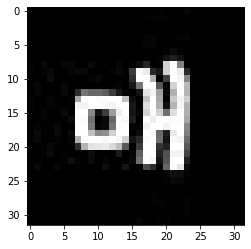

In [ ]:
plt.imshow(X[232, :, :, 0], cmap='gray' )

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

x_train = x_train[:,:,:, 0]  # Nx32x32
x_test = x_test[:,:,:, 0]

x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1) 

In [ ]:
#Data Augmentation
batch_size = 128
train_generator = ImageDataGenerator(rescale=1./255,   
                                     rotation_range=15,  
                                     width_shift_range=0.15, 
                                     height_shift_range=0.15,   
                                     shear_range=0.2,  zoom_range=[0.8, 1.2])

test_generator = ImageDataGenerator(rescale=1./255)

train_data_flow = train_generator.flow(x_train, y_train, batch_size=batch_size)
test_data_flow = test_generator.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=(32,32,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.50))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',   optimizer=RMSprop(learning_rate=0.001, rho=0.9),   metrics=['accuracy'])

In [ ]:
hist = model.fit_generator(train_data_flow, epochs=5, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
288/288 [==============================] - 13s 41ms/step - loss: 6.8884 - accuracy: 0.0012
Epoch 2/5
288/288 [==============================] - 12s 42ms/step - loss: 6.5400 - accuracy: 0.0045
Epoch 3/5
288/288 [==============================] - 12s 41ms/step - loss: 5.7147 - accuracy: 0.0169
Epoch 4/5
288/288 [==============================] - 13s 43ms/step - loss: 4.8555 - accuracy: 0.0516
Epoch 5/5
288/288 [==============================] - 13s 46ms/step - loss: 4.0577 - accuracy: 0.1097


In [ ]:
def hangul_cnn_model() :
  model = Sequential()
  model.add(Convolution2D(32, (3, 3), padding='same',
                  input_shape=(32,32,1)))
  model.add(Activation('relu'))
  model.add(Convolution2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Convolution2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.50))

  model.add(Convolution2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.compile(loss='sparse_categorical_crossentropy',   optimizer=RMSprop(learning_rate=0.001, rho=0.9),   metrics=['accuracy'])

  return model

In [ ]:
model = hangul_cnn_model()

In [ ]:
hist = model.fit(train_data_flow, epochs=10, verbose=1)

NameError: ignored

In [ ]:
model.save('hangul_cnn.h5')

In [ ]:
 model2 = keras.models.load_model("hangul_cnn.h5")
 model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

(32, 32, 1)
[897]
평


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


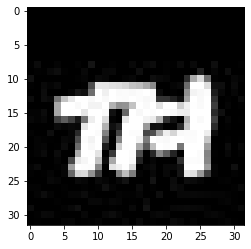

In [ ]:
test = x_test[0]  # 32x32x1
print(test.shape)
plt.imshow(test.reshape(32,32), cmap='gray')

#p = model.predict(test.reshape(1,32,32,1))   # 4차원  1x32x32x1
p = model.predict_classes(test.reshape(1,32,32,1))   # 4차원  1x32x32x1
print(p)

labels_file = io.open("label.txt", 'r', encoding='utf-8').read().splitlines()
#labels_file
print(labels_file[p[0]  ])

# Open CV 연동 한글 인식

In [ ]:
import keras
import io
import cv2

model = keras.models.load_model("hangul_cnn.h5")
labels_file = io.open("label.txt", 'r', encoding='utf-8').read().splitlines()

ix,iy = -1,-1
drawing = False
img = np.zeros((256,256), np.uint8)

def draw(event,x,y,flags,param):
    global ix,iy,drawing, img
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y        
        
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.line(img,(ix,iy),(x,y),(255,255,255),15)
            ix = x
            iy = y             
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False    
        
        
cv2.imshow('image',img)
cv2.setMouseCallback('image',draw)          


while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1)
    
    if k == 32 :
        img2 = cv2.resize(img, (32, 32), interpolation = cv2.INTER_LINEAR)
        plt.imshow(img2, cmap='gray')
        plt.show()        
        
        img2 = 1 - img2.reshape(1,32,32,1) / 255
        id = np.argmax(model.predict(img2))
        print(labels_file[id])
        img = np.zeros((256,256), np.uint8)           
        
        
    elif k == 27:
        break

cv2.destroyAllWindows()  

# ImageNet 을 이용한  영상인식

In [ ]:
from keras.applications.vgg16 import VGG16, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

<class 'PIL.Image.Image'>
(224, 224, 3)
(1, 224, 224, 3)


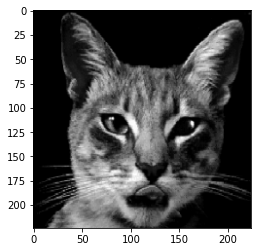

In [ ]:
image = load_img('cat.png', target_size=(224, 224))
plt.imshow(image)
print(type(image))
x = img_to_array(image)
print(x.shape)

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 1000)
[285]


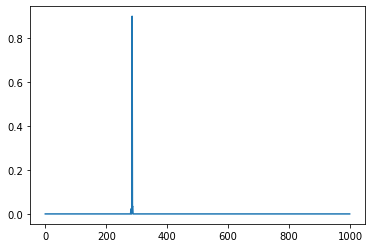

In [ ]:
pred = model.predict(x)
print(pred.shape)
plt.plot(pred[0,:])
print( np.argmax(pred, axis=1)  )

In [ ]:
print('Predicted:', decode_predictions(pred, top=3)[0])

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02124075', 'Egyptian_cat', 0.9010597), ('n02127052', 'lynx', 0.03418972), ('n02125311', 'cougar', 0.031837184)]


In [ ]:
with open("labels_h.txt", 'r', -1, 'utf-8') as f:    
     labels_h = f.read().splitlines()            
print(labels_h)      




'이집트 고양이'

봉투


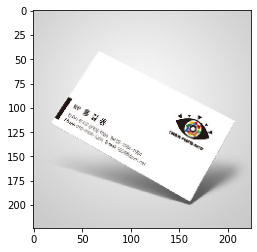

In [ ]:
image = load_img('card.jpg', target_size=(224, 224))
plt.imshow(image)
x = img_to_array(image)
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
id = np.argmax(pred, axis=1)[0]
print(labels_h[id])

# zip 파일 풀기

In [ ]:
!unzip smallcatdog.zip

In [ ]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'data/train',  
        target_size=(224, 224), 
        batch_size=batch_size,
        class_mode='binary')  #categorical

Found 2002 images belonging to 4 classes.


In [ ]:
from keras.layers import GlobalAveragePooling2D



def mycnn() :

  image_size = 224
  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
  #vgg_conv.trainable = False
  for layer in vgg_conv.layers[:]:
      layer.trainable = False

  model = Sequential()

  model.add(vgg_conv)
  #model.add(Flatten())
  model.add(GlobalAveragePooling2D())
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer = 'adam',  loss = 'sparse_categorical_crossentropy',metrics=['accuracy']) 

  return model

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)
with tf.device(device_name):
  dogcat =  mycnn()
  history = dogcat.fit(train_generator, epochs=3)


Epoch 1/3
  4/126 [..............................] - ETA: 16:30 - loss: 1.0168 - accuracy: 0.4948

KeyboardInterrupt: ignored

In [ ]:
!ls data/train

cat  dog  food
